# Preliminary Time Series Analysis: Microbiome data
    For all designations/subclassifications of species in the microbiome, do the following
    time series tests.
    
    1. For each time point, find classifications where its z-score deviates from all other time points
    2. Treat each time point as the last time point, for 0...t, find classifications where its z-scores deviates
        from all other points
    3. Treat each time point as the last time point, find linear trends
    4. Do changepoint analysis based on differences between population and sliding window.
    5. Autocorrelation

In [1]:
import sys
sys.path.append('../../src/')

# User Libraries
import stats.timeseries as ts
import stats.helpers as shelp
import microbiome.data as mb

# Python Libraries
import pandas as pd
import os 
import seaborn as sns

# Ipython Configuration
%pylab inline
%load_ext autoreload
%autoreload 2

# Data and analysis paths
microbiome_path = "/mounts/tscc/projects/Li-Fraumeni/data/family3/microbiome/14009b/aggregated/"
analysis_path = "/mounts/tscc/projects/Li-Fraumeni/analysis/microbiome"

Populating the interactive namespace from numpy and matplotlib


In [2]:
date = "09142015"
analysis_path = os.path.join(analysis_path, date)
if not os.path.exists(analysis_path): os.makedirs(analysis_path)
sns.set_context("talk", font_scale=1.5)
sns.set_style("whitegrid")

###  For the last time point, see if its zscore deviates from previous.

In [3]:
sample_fn = microbiome_path+'tigrfam-subrole-ann.txt'
data_df = mb.load_aggregated(sample_fn)

In [4]:
data_df.head()

Sub_role,Aromatic amino acid family,Aspartate family,Glutamate family,Histidine family,Other,Pyruvate family,Serine family,Biotin,Chlorophyll and bacteriochlorphyll,Folic acid,...,"Carbohydrates, organic alcohols, and acids",Cations and iron carrying compounds,"Nucleosides, purines and pyrimidines",Other,Porins,Unknown substrate,Role category not yet assigned,Unclassified,Enzymes of unknown specificity,General
Main_role,Amino acid biosynthesis,Amino acid biosynthesis,Amino acid biosynthesis,Amino acid biosynthesis,Amino acid biosynthesis,Amino acid biosynthesis,Amino acid biosynthesis,"Biosynthesis of cofactors, prosthetic groups, and carriers","Biosynthesis of cofactors, prosthetic groups, and carriers","Biosynthesis of cofactors, prosthetic groups, and carriers",...,Transport and binding proteins,Transport and binding proteins,Transport and binding proteins,Transport and binding proteins,Transport and binding proteins,Transport and binding proteins,Unclassified,Unclassified,Unknown function,Unknown function
2014-07-12,0.006816,0.010298,0.008592,0.004905,0.000061,0.006468,0.005409,0.001750,0.001123,0.002455,...,0.013158,0.033849,0.000732,0.022487,0.003570,0.016285,0.000017,0.004129,0.016373,0.032736
2014-08-08,0.006587,0.010128,0.008353,0.004892,0.000037,0.006585,0.005643,0.002151,0.000780,0.003137,...,0.015073,0.033508,0.000688,0.024429,0.008597,0.032950,0.000005,0.003490,0.014682,0.031347
2014-08-20,0.006404,0.010065,0.008027,0.004632,0.000036,0.006253,0.005362,0.002383,0.000905,0.002720,...,0.013808,0.033436,0.000676,0.022393,0.006565,0.026480,0.000021,0.004032,0.015022,0.030555
2014-09-16,0.007184,0.010496,0.008834,0.004800,0.000062,0.006744,0.005483,0.001749,0.000819,0.002858,...,0.017227,0.034031,0.000743,0.023266,0.004111,0.017252,0.000010,0.004112,0.016158,0.033200
2014-09-24,0.006768,0.010405,0.008338,0.004967,0.000050,0.006967,0.005648,0.002099,0.000879,0.002961,...,0.015047,0.033422,0.000665,0.023511,0.006695,0.027842,0.000011,0.003818,0.015065,0.031504


In [5]:
sample ='2014-12-18'
outliers = ts.outliers(data_df, z_threshold=1.67,
                       sample = sample)

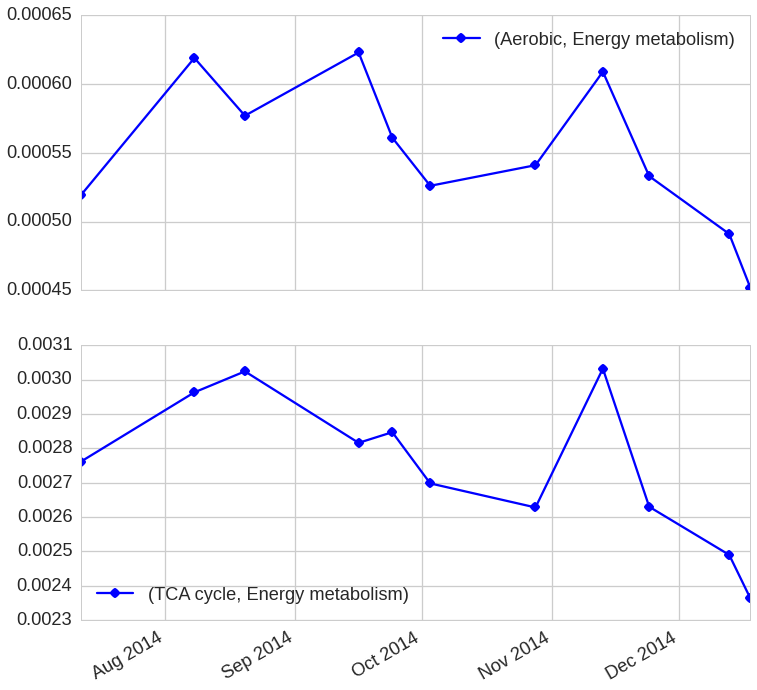

In [6]:
sns.set_context('talk', font_scale=1.4)
fig = plt.figure(figsize=(12,12))
axes = data_df[outliers[sample]].plot(subplots=True, marker='o', c='b',
                                      figsize=(12,12))

### Using the entire population, look at deviations for any time point

In [7]:
outliers = ts.outliers(data_df, z_threshold=1.67)

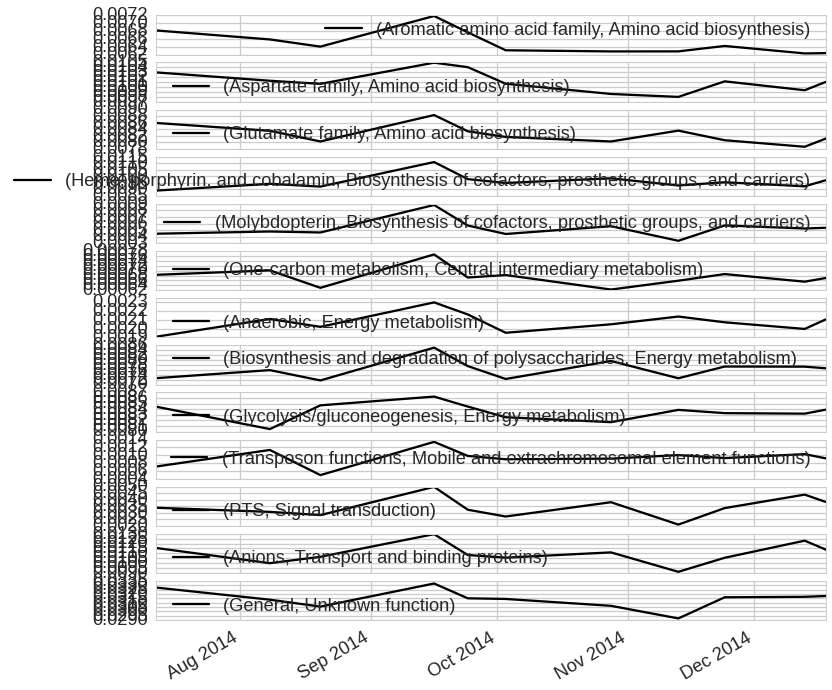

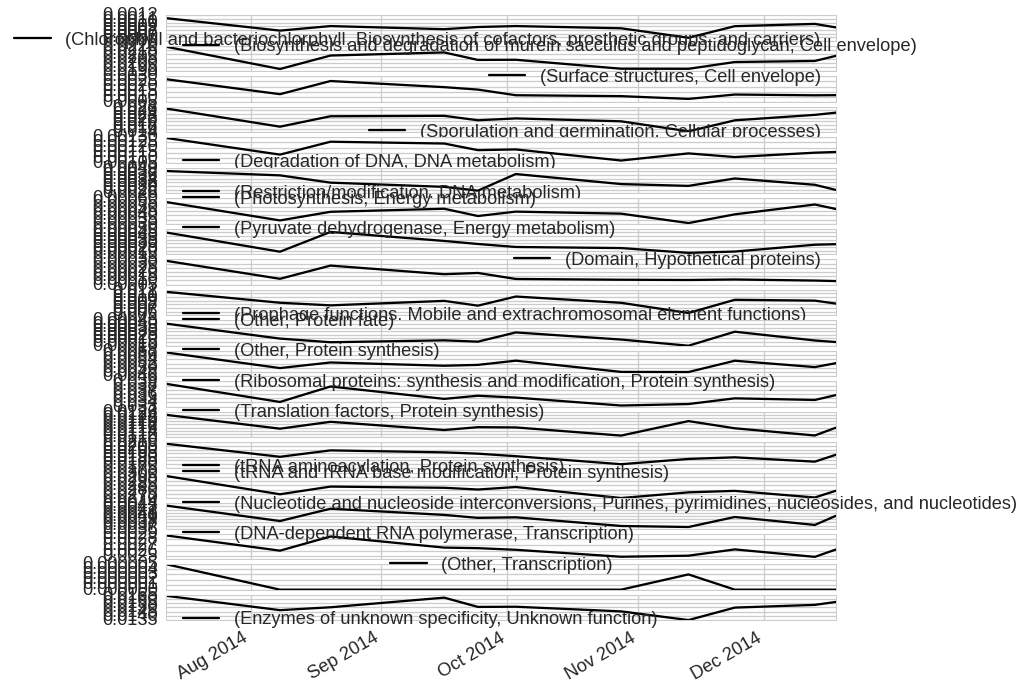

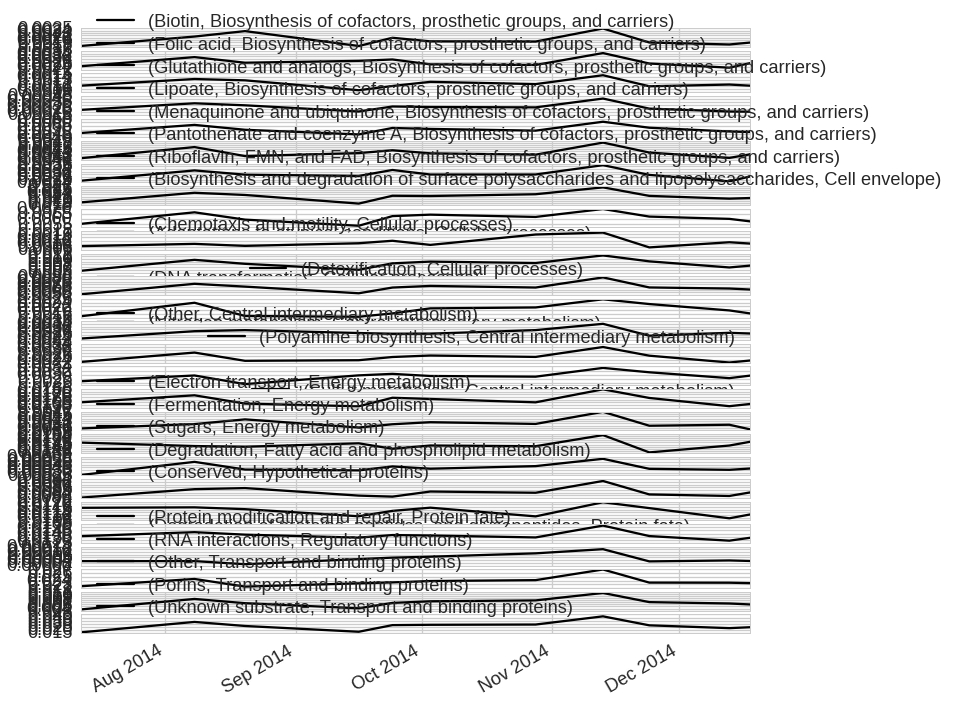

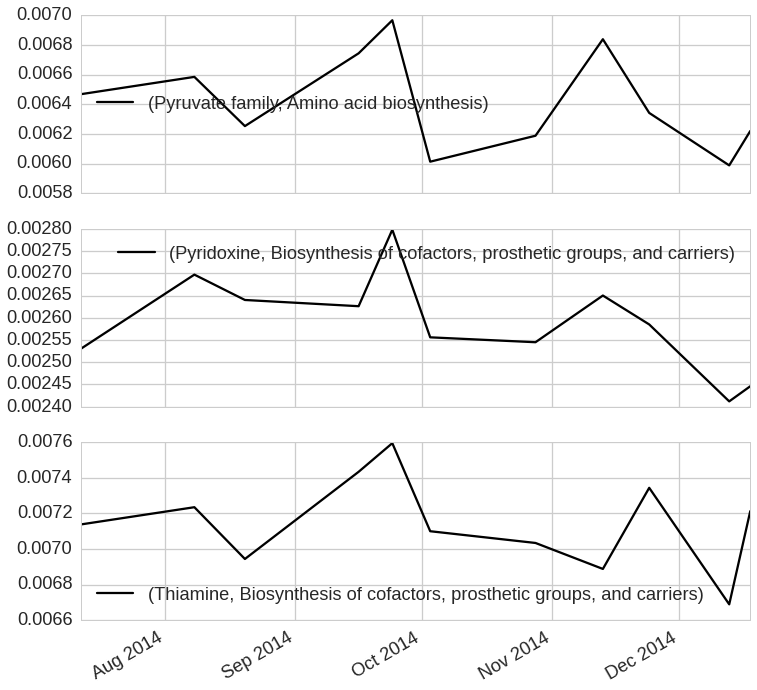

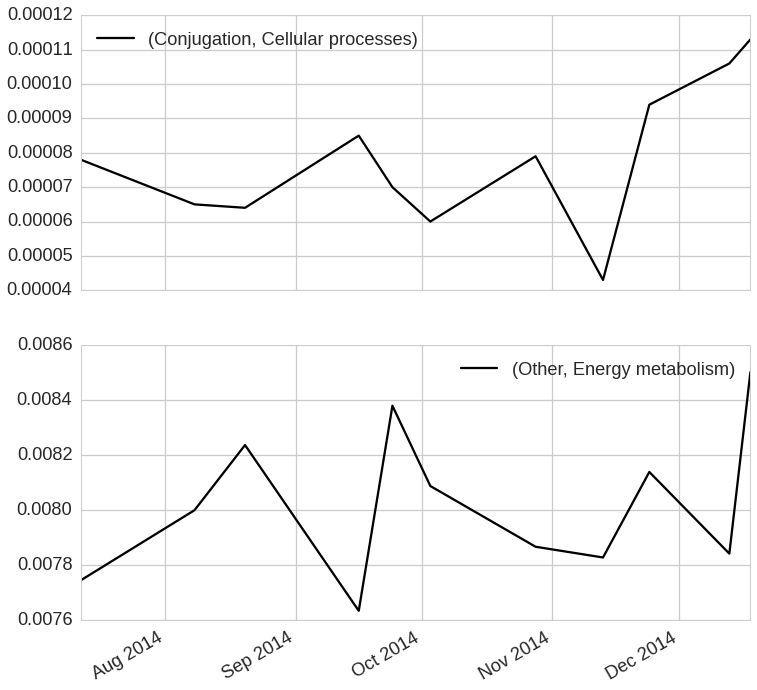

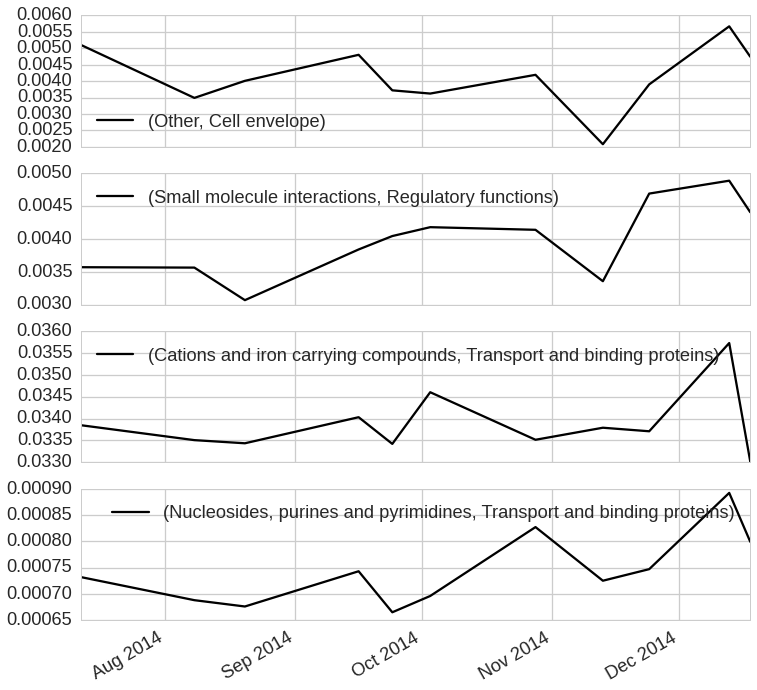

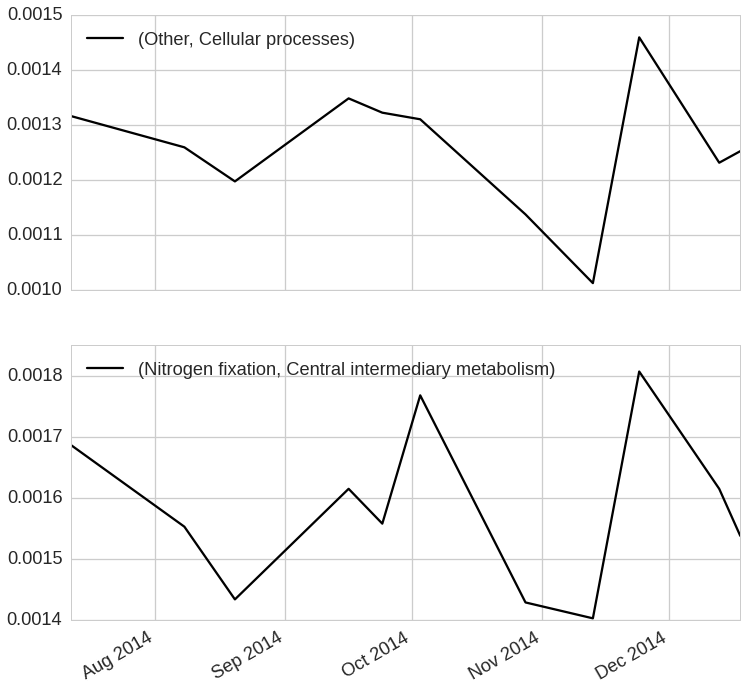

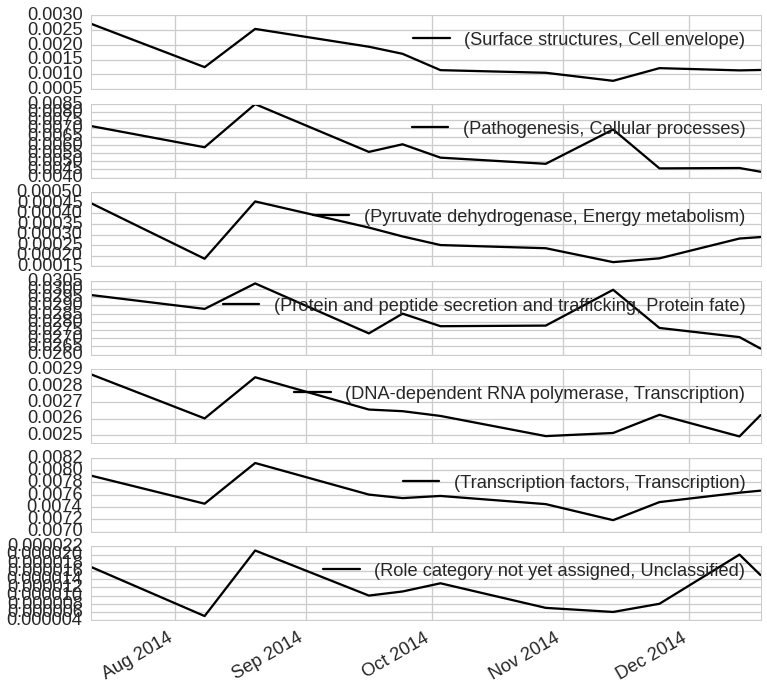

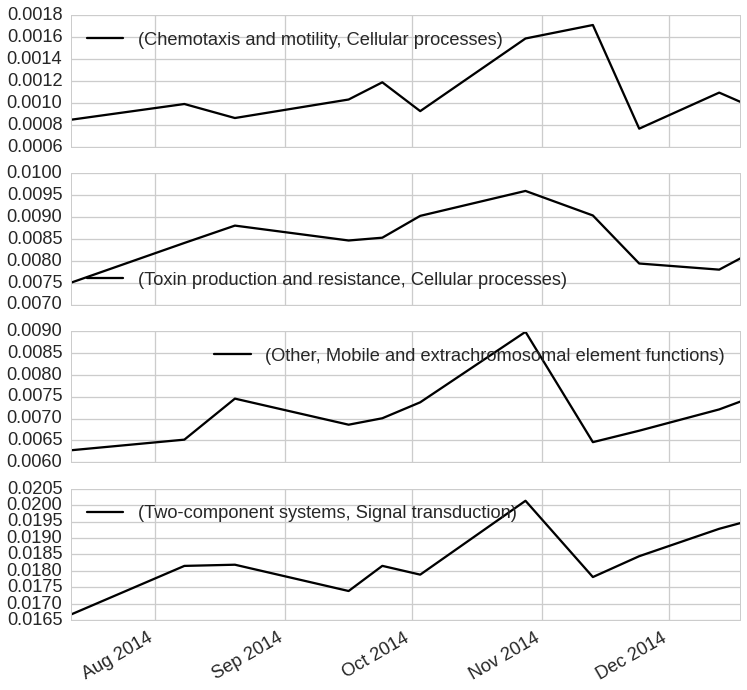

In [8]:
for day, classification in outliers.iteritems():
    if len(classification) > 0:
        data_df[classification].plot(subplots=True, figsize=(12, 12))

### Linear Trends

In [10]:
pvalues = ts.regress(data_df)

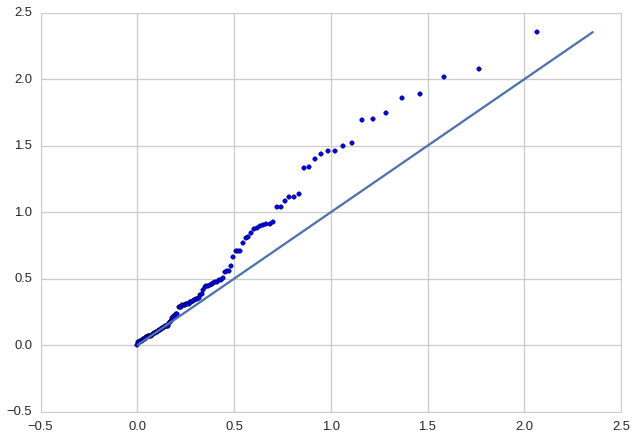

In [11]:
x, y = shelp.qqvalues(pvalues)
sns.set_context("talk")
scatter(x,y)
plot(y, y)

### Changepoint Analysis
:: using https://github.com/amanahuja/change-detection-tutorial

In [20]:
changepoints = ts.changepoints(data_df)

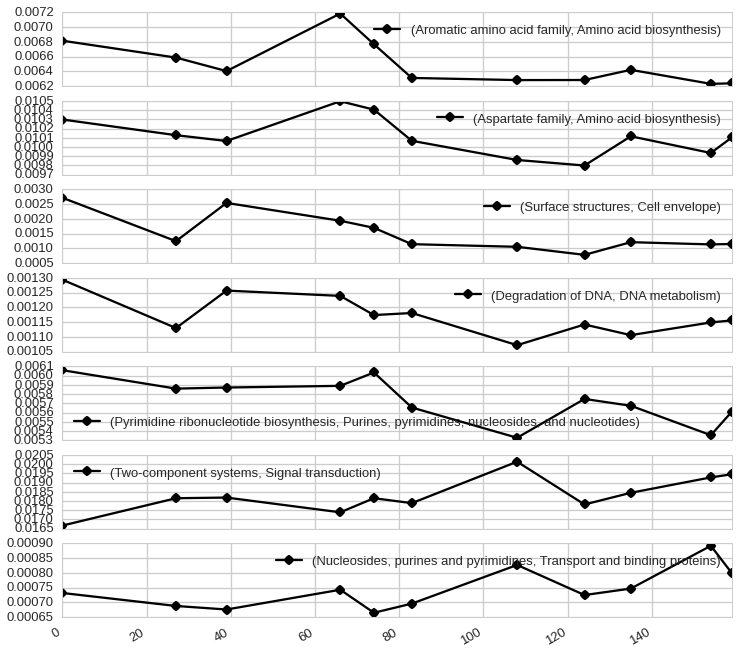

In [26]:
data_df[changepoints[changepoints > 0].index].plot(subplots=True, 
                                                   figsize=(12, 12),
                                                   marker='o');

### Autocorrelation - see if there are cyclic patterns; unfortunately unevenly spaced points. We could do spectral, but hunch is that there are not enough data points.